## PCA (Core)

### Reducción de Dimensionalidad

### Descripción:

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: [wine quality cortez](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)



### Objetivo:

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.

**These datasets can be viewed as _classification or regression_ tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). _Outlier detection algorithms could be used to detect the few excellent or poor wines_. Also, _we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods_.**


#### Instrucciones:

### 1. Carga de datos:

  – Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.

  – El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


In [3]:
#descargamos el dataset
df = pd.read_csv('../data/winequality-red.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#verificamos si hay valores nulos
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#buscamos y eliminamos duplicados si hubiese
# Identificación de valores duplicados
duplicados = df.duplicated().sum()
print(f'Número de registros duplicados: {duplicados}')

# Eliminación de valores duplicados
df_train = df.drop_duplicates()

Número de registros duplicados: 240


In [6]:
#Codigo para detectar outliers usando el IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return True for outliers
    return (data < lower_bound) | (data > upper_bound)

In [7]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
fixed acidity,49.0,3.064415,4.60000,12.300
volatile acidity,19.0,1.188243,0.12000,1.010
citric acid,1.0,0.062539,0.00000,0.790
residual sugar,155.0,9.693558,0.90000,3.650
chlorides,112.0,7.004378,0.04100,0.119
free sulfur dioxide,30.0,1.876173,1.00000,42.000
total sulfur dioxide,55.0,3.439650,6.00000,122.000
density,45.0,2.814259,0.99235,1.001
pH,35.0,2.188868,2.93000,3.680
sulphates,59.0,3.689806,0.33000,0.990



### 2. Exploración y preprocesamiento de datos:

  – Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.

  – Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.


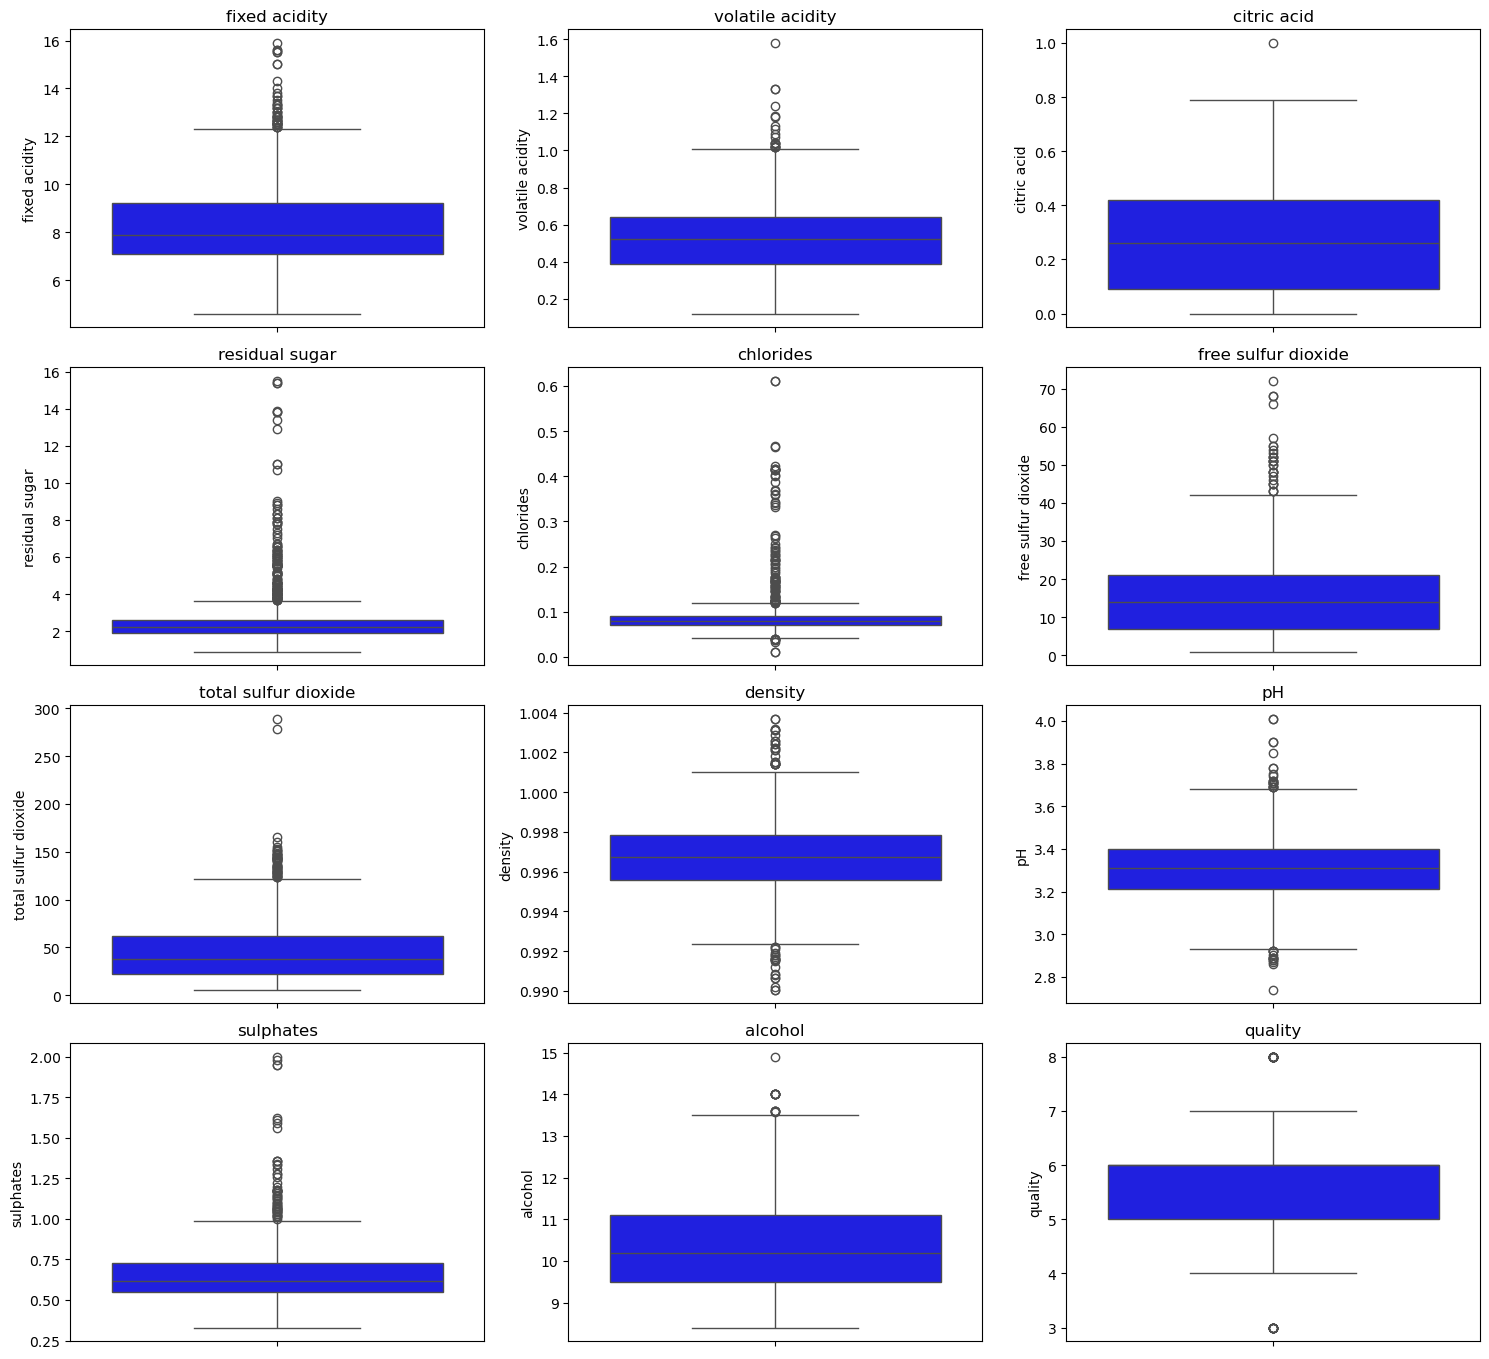

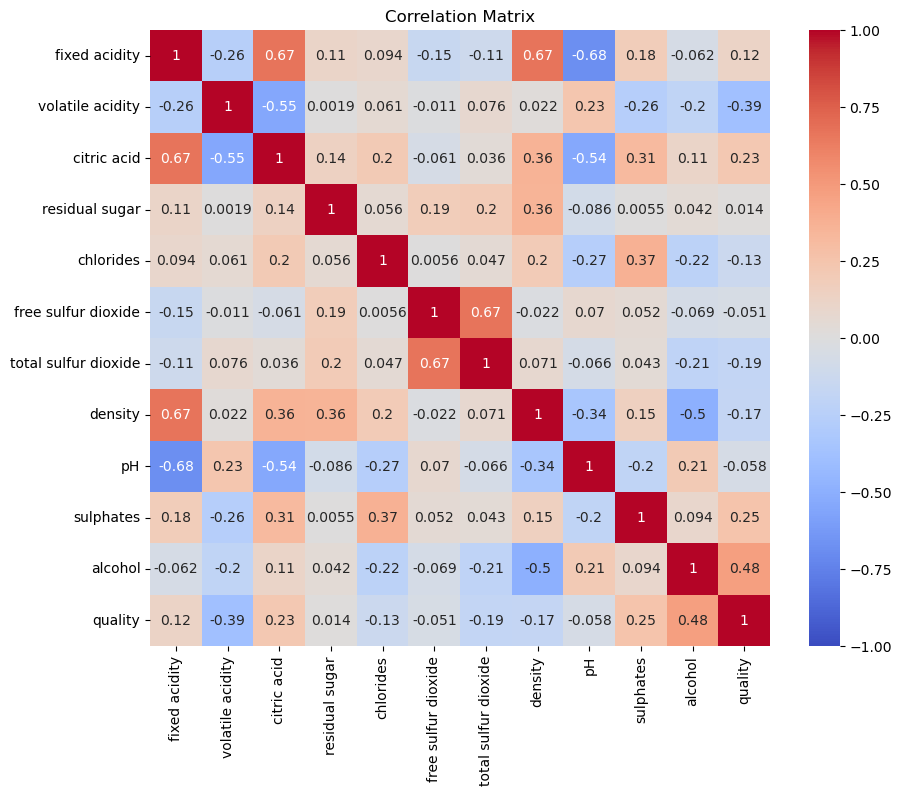

In [8]:
# Configurar el tamaño de la figura 
plt.figure(figsize=(15, 17)) 
# Crear un boxplot para cada variable en el DataFrame 
for i, column in enumerate(df.columns, 1): 
    plt.subplot(len(df.columns)//3 + 1, 3, i) 
    sns.boxplot(data=df[column], orient="v", color="blue") 
    plt.title(column) 
# Ajustar el layout para que los plots no se sobrepongan 
plt.tight_layout() 
# Mostrar los plots 
plt.show()

# calculate correlation with numerical_features
corr_matrix = df[numerical_columns].corr(method='pearson')

# create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# definimos el target y las features
y = df['quality']
X = df.drop('quality', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



### 3. Aplicación de PCA:

  – Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.

  – Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.


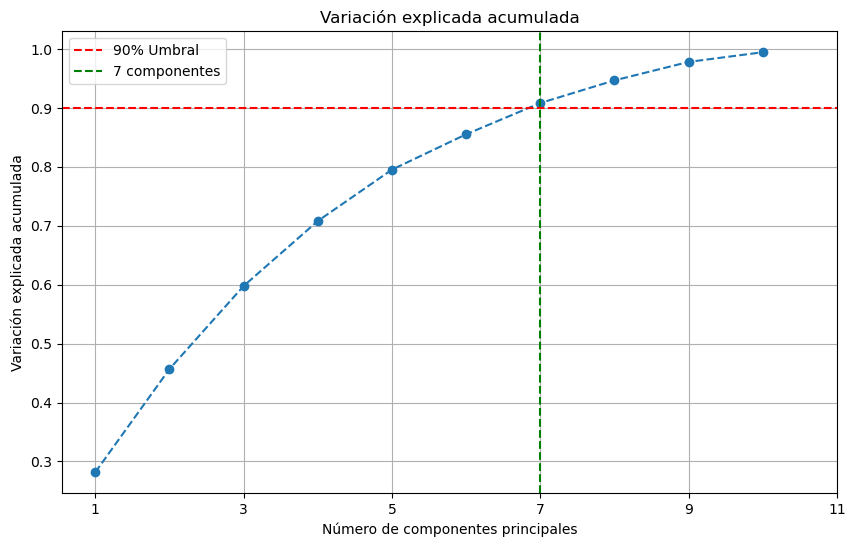

Variación explicada acumulada:
Componente 1: 28.17%
Componente 2: 45.68%
Componente 3: 59.78%
Componente 4: 70.81%
Componente 5: 79.53%
Componente 6: 85.52%
Componente 7: 90.83%
Componente 8: 94.68%
Componente 9: 97.81%
Componente 10: 99.46%


In [10]:
pca_full = PCA(n_components=10)
pca_full.fit(X_scaled)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 12, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")


### 4. Interpretación de los componentes principales:

  – Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.

  – Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.


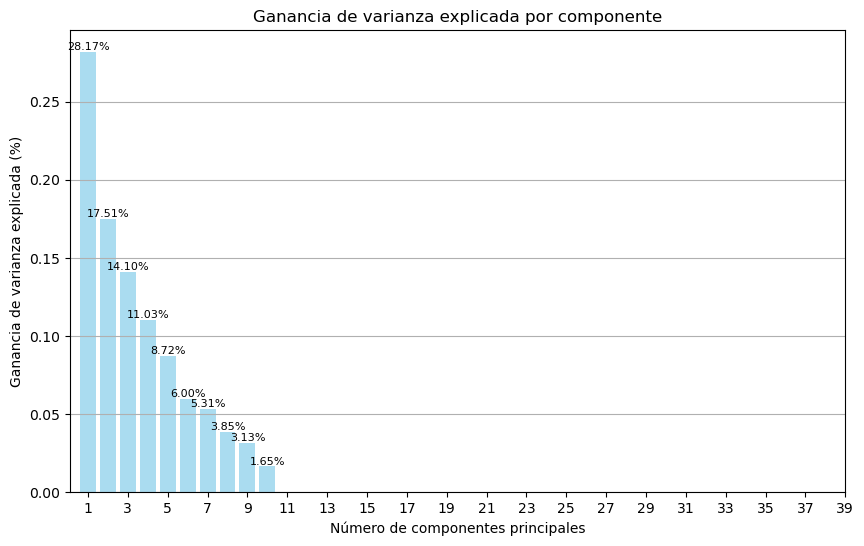

Ganancia de varianza explicada por componente:
Componente 1: 28.17%
Componente 2: 17.51%
Componente 3: 14.10%
Componente 4: 11.03%
Componente 5: 8.72%
Componente 6: 6.00%
Componente 7: 5.31%
Componente 8: 3.85%
Componente 9: 3.13%
Componente 10: 1.65%


In [11]:
explained_variance_gain = np.diff(explained_variance_cumulative, prepend=0)

# Graficar la ganancia de varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance_gain, color='skyblue', alpha=0.7)
plt.title('Ganancia de varianza explicada por componente')
plt.xlabel('Número de componentes principales')
plt.ylabel('Ganancia de varianza explicada (%)')
plt.xticks(range(1, 41, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(axis='y')

# Resaltar las primeras componentes principales más significativas
threshold_gain = 0.01  # Umbral de ganancia significativa (1%)
significant_components = [i for i, gain in enumerate(explained_variance_gain, 1) if gain > threshold_gain]
for component in significant_components:
    plt.text(component, explained_variance_gain[component - 1], f"{explained_variance_gain[component - 1]:.2%}", 
            ha='center', va='bottom', fontsize=8, color='black')

plt.show()

# Mostrar las ganancias para cada componente
print("Ganancia de varianza explicada por componente:")
for i, gain in enumerate(explained_variance_gain, 1):
    print(f"Componente {i}: {gain:.2%}")

**La reducción de dimensionalidad mediante Análisis de Componentes Principales (PCA) puede simplificar la construcción de modelos predictivos eliminando redundancias en las características y capturando la esencia de los datos en menos dimensiones.**


### 5. Visualización y comparación:

  – Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.

  – Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.


Varianza explicada por cada componente principal:
Componente 1: 28.17%
Componente 2: 17.51%
Varianza explicada total con 7 componentes: 90.83%
Dimensiones originales: 11
Dimensiones reducidas: 7


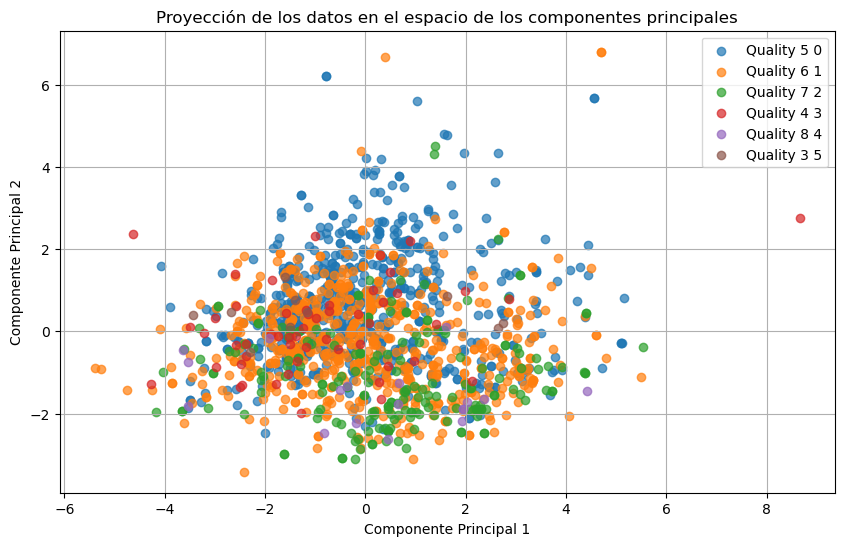

In [12]:


# Aplicar PCA con el número seleccionado de componentes
pca_final = PCA(n_components=7)
X_pca_7 = pca_final.fit_transform(X_scaled)

explained_variance = pca_final.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")

# Mostrar la varianza explicada acumulada con 7 componentes
explained_variance_7 = pca_final.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 7 componentes: {explained_variance_7:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_scaled.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_7.shape[1]}")

plt.figure(figsize=(10, 6))
for i in range(len(df['quality'].unique())):
    subset = X_pca_7[y == df['quality'].unique()[i]][:, :2]  # Usar solo las primeras 2 componentes
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Quality {df["quality"].unique()[i]} {i}', alpha=0.7)

plt.title('Proyección de los datos en el espacio de los componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()


### Análisis de Resultados:

- Realiza un análisis detallado sobre cuántos componentes principales son necesarios para capturar una cantidad significativa de variabilidad. Discute la importancia de las variables que más contribuyen a los primeros componentes.
- Explica cómo PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características.



#### La varianza explicada por cada componente principal es la siguiente:

Componente 1: 28.17%

Componente 2: 17.51%

En este caso, los dos primeros componentes principales explican el 45.68% de la variabilidad total (28.17% + 17.51%). Si se desea capturar más del 90% de la variabilidad, se necesitarían más componentes, pero se podría considerar que con 7 componentes principales se captura una cantidad significativa de la variabilidad, ya que se ha reducido de 11 dimensiones originales a 7 dimensiones reducidas.

#### Importancia de las variables que más contribuyen a los primeros componentes:

Las variables que más contribuyen a los primeros componentes principales son las que tienen los coeficientes más altos en la matriz de componentes. Estas variables son importantes porque capturan la mayor parte de la variabilidad en los datos. En el caso del primer componente principal, las variables con los coeficientes más altos son las que más influyen en la dirección de máxima varianza. De manera similar, para el segundo componente principal, las variables con los coeficientes más altos son las que más influyen en la segunda dirección de máxima varianza, ortogonal a la primera.

#### Utilidad de PCA para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características:

##### PCA puede ser útil para mejorar el rendimiento de los modelos de machine learning en datasets con muchas características de varias maneras:

Reducción de dimensionalidad: Al reducir el número de características, se disminuye la complejidad del modelo, lo que puede llevar a una mejora en el rendimiento y a una reducción del riesgo de sobreajuste.

Eliminación de ruido: PCA ayuda a eliminar características redundantes y ruidosas, lo que puede mejorar la precisión del modelo.

Mejora de la interpretabilidad: Con menos características, es más fácil interpretar los resultados del modelo y entender qué variables son más importantes.

Aceleración del entrenamiento: Menos características implican menos cálculos, lo que puede acelerar el proceso de entrenamiento del modelo.



### Conclusión:

- Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.